In [ ]:
%ls instruments_data

acoustic_guitar/  drums/  gramophone/  piano/      tabla/
bass_guitar/      flute/  harp/        saxophone/  violin/


In [ ]:
from fastai.vision.all import *

classes=['acoustic_guitar',
         'drums',
         'gramophone',
         'piano',
         'tabla',
         'bass_guitar',
         'flute',
         'harp',
        'saxophone',
         'violin']

path = Path('./instruments_data')
from fastbook import *
from utils import *
for c in classes:
    print(c)
    fns = get_image_files(path)
    failed=(verify_images(fns))
    failed.map(Path.unlink)
    print(failed)
    
    
   
    

In [ ]:
fnames = get_image_files(path)
fnames

(#3212) [Path('instruments_data/bass_guitar/bass_guitar (163).jpg'),Path('instruments_data/bass_guitar/bass_guitar (141).jpg'),Path('instruments_data/bass_guitar/bass_guitar (2).jpg'),Path('instruments_data/bass_guitar/bass_guitar (151).jpg'),Path('instruments_data/bass_guitar/bass_guitar (15).jpg'),Path('instruments_data/bass_guitar/bass_guitar (222).jpg'),Path('instruments_data/bass_guitar/bass_guitar (134).jpg'),Path('instruments_data/bass_guitar/bass_guitar (196).jpg'),Path('instruments_data/bass_guitar/bass_guitar (72).jpg'),Path('instruments_data/bass_guitar/bass_guitar (81).jpg')...]

In [ ]:
np.random.seed(42)
dls = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(460, min_scale=0.75),
                                    bs=64, batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [ ]:
dls.vocab

['acoustic_guitar', 'bass_guitar', 'drums', 'flute', 'gramophone', 'harp', 'piano', 'saxophone', 'tabla', 'violin']

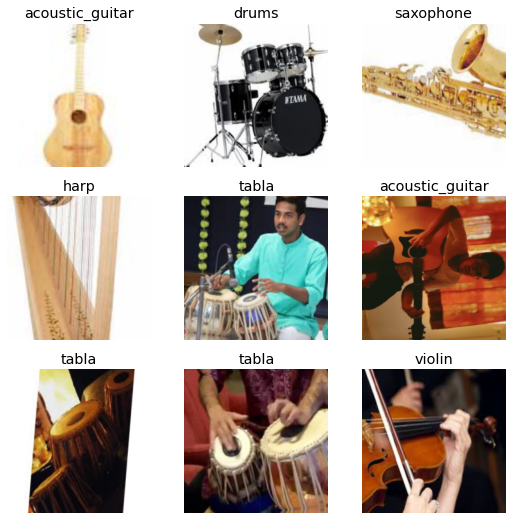

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(4,lr_max=3e-4)

In [ ]:
learn.fit_one_cycle(1,lr_max=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.885711,0.174252,0.052960,00:41


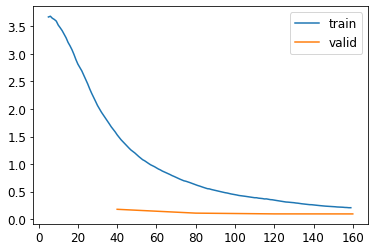

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save('stage-1')

Path('instruments_data/models/stage-1.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

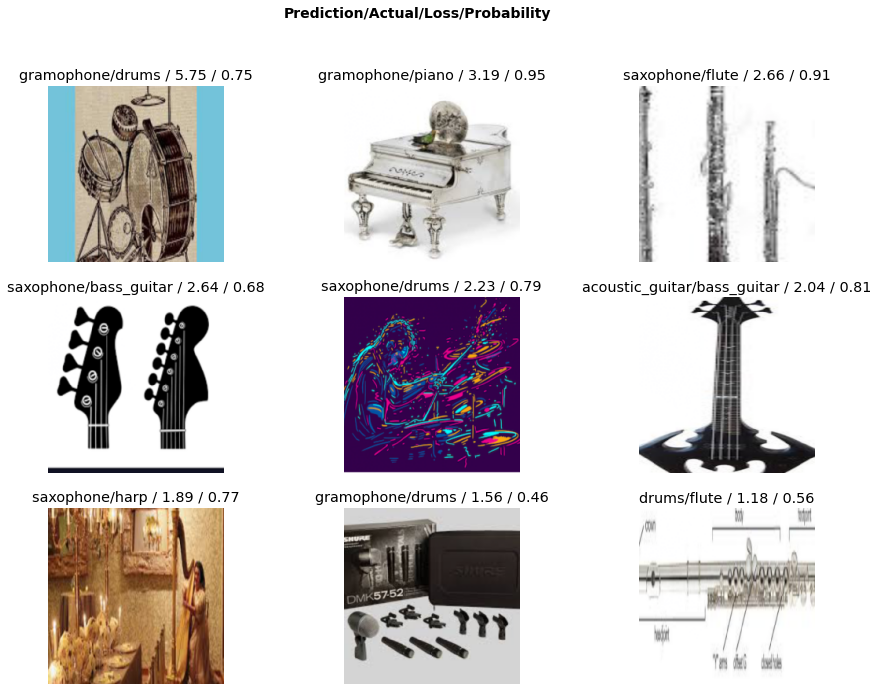

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=2)

[('drums', 'gramophone', 2), ('harp', 'saxophone', 2)]

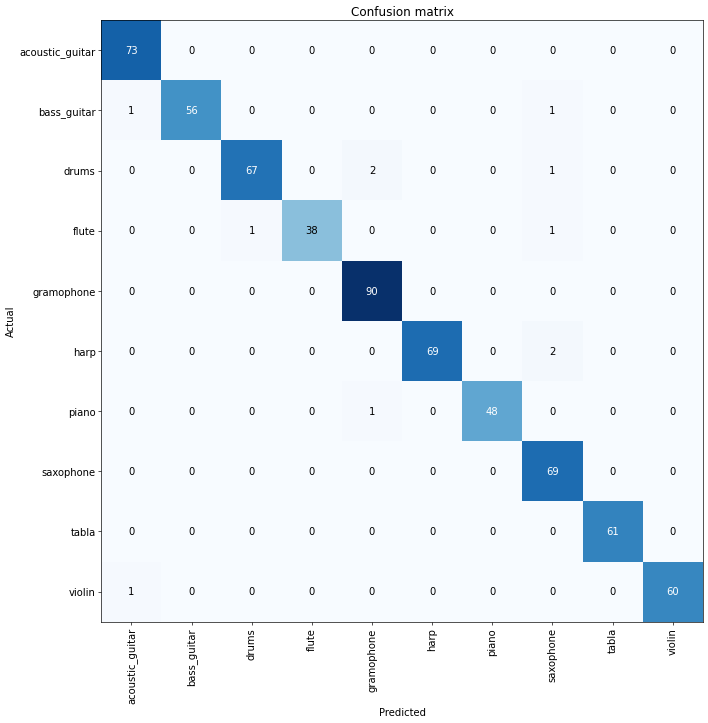

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.497874,0.744169,0.180685,00:55


SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=2.75422871709452e-06)

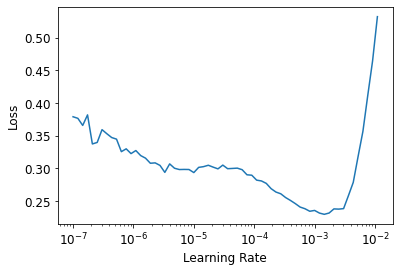

In [ ]:
learn.load('stage-1')
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max=slice(2e-6,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.273351,0.146040,0.040498,00:56
1,0.197779,0.115783,0.031153,00:56
2,0.143627,0.109141,0.031153,00:56
3,0.107725,0.107675,0.029595,00:56


In [ ]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.302358,0.099820,0.028037,00:55
1,0.192018,0.084207,0.021807,00:54
2,0.133284,0.090060,0.024922,00:54
3,0.103054,0.085386,0.023364,00:54


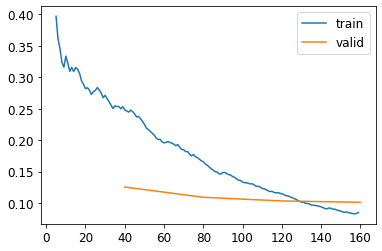

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.272967,0.141734,0.040498,00:56
1,0.214647,0.116049,0.031153,00:56
2,0.153572,0.108167,0.031153,00:56
3,0.133026,0.106665,0.029595,00:56


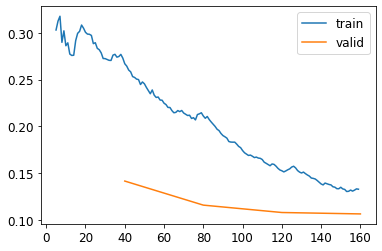

In [ ]:
learn.recorder.plot_loss()

In [ ]:
img = Image.open('VIOLIN.jpeg')
img

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')
learn = torch.load(path/'export.pkl')
pred_class,pred_idx,outputs = learn.predict('flute.jpg')
pred_class

'flute'

In [ ]:
pred_class,pred_idx,outputs = learn.predict('VIOLIN.jpeg')
pred_class

'violin'

In [ ]:
#hide_output
lbl_pred = widgets.Label()
img = PILImage.create(btn_upload.data[-1])

btn_upload = SimpleNamespace(data = ['VIOLIN.jpeg'])

pred,pred_idx,probs = learn.predict(img)

lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: violin; Probability: 0.9987')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()


In [ ]:

#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
from fastbook import *
from ipywidgets import *

#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

NameError: name 'learn_inf' is not defined

NameError: name 'learn_inf' is not defined